In [109]:
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
name = "comb6"

In [111]:
df_cloud = pd.read_csv(f'/Users/daniele/Tesi/Test/results-combined/{name}-cloud.log')
df_edge = pd.read_csv(f'/Users/daniele/Tesi/Test/results-combined/{name}-edge.log')

In [112]:
#Print the size of the datasets
print(f"Policy dataset size: {len(df_cloud)}")
print(f"Edge only dataset size: {len(df_edge)}")

Policy dataset size: 3075
Edge only dataset size: 3075


In [113]:
df_cloud.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1674050226575,4984,HTTP Request,200,OK,Open Model Thread Group 2-1,text,True,NaN,349,273,3,3,http://10.10.1.2:1323/invoke/fib,4973,0,109
1,1674050231785,383,HTTP Request,200,OK,Open Model Thread Group 2-4,text,True,NaN,331,273,3,3,http://10.10.1.2:1323/invoke/fib,383,0,2
2,1674050233604,218,HTTP Request,500,Internal Server Error,Open Model Thread Group 2-7,text,False,NaN,135,273,5,5,http://10.10.1.2:1323/invoke/fib,218,0,3
3,1674050234013,111,HTTP Request,500,Internal Server Error,Open Model Thread Group 2-8,text,False,NaN,135,273,5,5,http://10.10.1.2:1323/invoke/fib,111,0,5
4,1674050233375,873,HTTP Request,200,OK,Open Model Thread Group 2-6,text,True,NaN,333,273,6,6,http://10.10.1.2:1323/invoke/fib,873,0,4


In [114]:
error_cloud = df_cloud[df_cloud['responseCode'] != 200]
error_edge = df_edge[df_edge['responseCode'] != 200]

In [115]:
len(error_cloud)

489

In [116]:
len(error_edge)

627

In [117]:
#filter dataframes by response code
filtered_cloud = df_cloud[df_cloud['responseCode'] == 200]
filtered_edge = df_edge[df_edge['responseCode'] == 200]

In [118]:
#mean response time
mean_cloud = filtered_cloud['elapsed'].mean()
mean_edge = filtered_edge['elapsed'].mean()
print(mean_cloud, mean_edge)

516.5116009280742 472.7438725490196


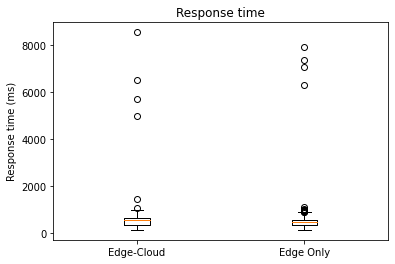

In [119]:
#Box and wiskers plot of response time of cloud and edge with matplotlib
fig, ax = plt.subplots()
ax.boxplot([filtered_cloud['elapsed'], filtered_edge['elapsed']])
ax.set_xticklabels(['Edge-Cloud', 'Edge Only'])
ax.set_ylabel('Response time (ms)')
ax.set_title('Response time')
plt.show()

In [120]:
#Remove outliers
filtered_cloud_o = filtered_cloud[filtered_cloud['elapsed'] < 2000]
filtered_edge_o = filtered_edge[filtered_edge['elapsed'] < 2000]

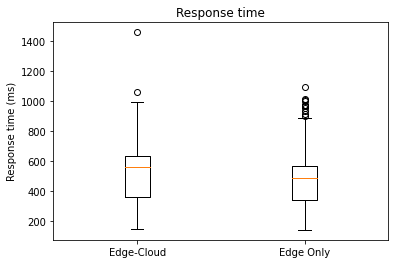

In [121]:
#Box and wiskers plot of response time of cloud and edge with matplotlib
fig, ax = plt.subplots()
ax.boxplot([filtered_cloud_o['elapsed'], filtered_edge_o['elapsed']])
ax.set_xticklabels(['Edge-Cloud', 'Edge Only'])
ax.set_ylabel('Response time (ms)')
ax.set_title('Response time')
plt.show()

0.15902439024390244 0.20390243902439023


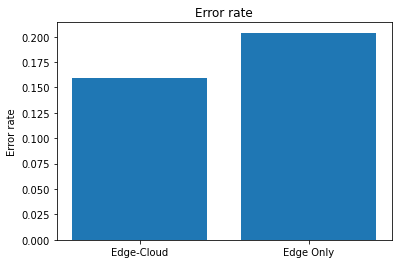

In [122]:
#Error rate of cloud and edge
error_rate_cloud = len(error_cloud) / len(df_cloud)
error_rate_edge = len(error_edge) / len(df_edge)
print(error_rate_cloud, error_rate_edge)
# Bar graph of error rate
fig, ax = plt.subplots()
ax.bar(['Edge-Cloud', 'Edge Only'], [error_rate_cloud, error_rate_edge])
ax.set_ylabel('Error rate')
ax.set_title('Error rate')
plt.show()

In [125]:
#List of threadName values
threadName_cloud = filtered_cloud['threadName'].unique()
threadName_edge = filtered_edge['threadName'].unique()

In [128]:
threadName_cloud

array(['Open Model Thread Group 2-1', 'Open Model Thread Group 2-4',
       'Open Model Thread Group 2-6', ...,
       'Open Model Thread Group 2-3071', 'Open Model Thread Group 2-3074',
       'Open Model Thread Group 2-3075'], dtype=object)